# All major disasters

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset
data = pd.read_csv('natural_disasters_dataset.csv')

# Displaying information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16126 entries, 0 to 16125
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        16126 non-null  int64  
 1   Seq                         16126 non-null  int64  
 2   Glide                       1581 non-null   object 
 3   Disaster Group              16126 non-null  object 
 4   Disaster Subgroup           16126 non-null  object 
 5   Disaster Type               16126 non-null  object 
 6   Disaster Subtype            13016 non-null  object 
 7   Disaster Subsubtype         1077 non-null   object 
 8   Event Name                  3861 non-null   object 
 9   Country                     16126 non-null  object 
 10  ISO                         16126 non-null  object 
 11  Region                      16126 non-null  object 
 12  Continent                   16126 non-null  object 
 13  Location                    143

In [ ]:
data.head()

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
1,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,India,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
2,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,...,NaN,NaN,NaN,NaN,25000.0,3.350513,NaN,NaN,NaN,NaN
3,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
4,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN


### Visualizations for EDA

<Figure size 1200x600 with 0 Axes>

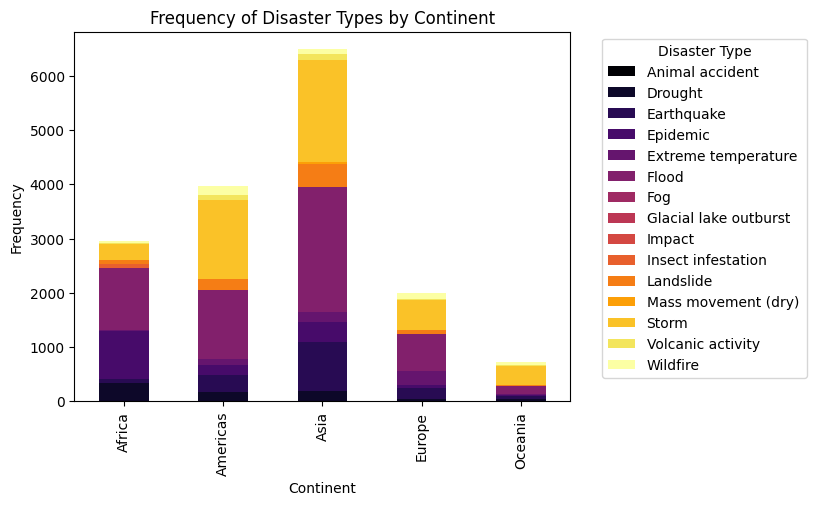

In [ ]:
import matplotlib.pyplot as plt

# For this plot, we are grouping the data by 'Continent' and 'Disaster Type' and counting the frequency of the Disaster Type
disaster_counts = data.groupby(['Continent', 'Disaster Type']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
disaster_counts.plot(kind='bar', stacked=True, colormap='inferno')

plt.xlabel('Continent')
plt.ylabel('Frequency')
plt.title('Frequency of Disaster Types by Continent')

plt.legend(title='Disaster Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [ ]:
top_continents = disaster_counts.sum(axis=1).nlargest(5)
print("Continents where the disasters occurred more, in descending order:")
print(top_continents)

Continents where the disasters occurred more, in descending order:
Continent
Asia        6490
Americas    3971
Africa      2946
Europe      1997
Oceania      722
dtype: int64


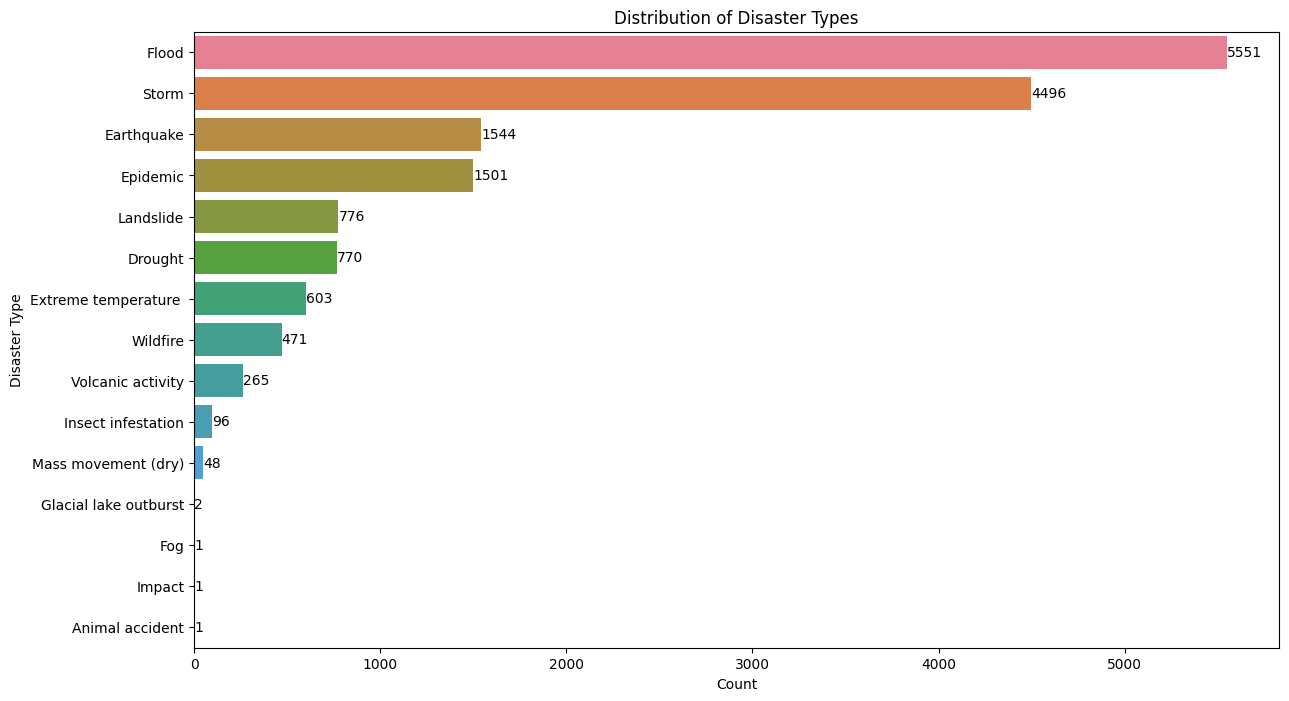

In [ ]:
import seaborn as sns

plt.figure(figsize=(14, 8))
disaster_type_counts = data['Disaster Type'].value_counts()

sns.barplot(x=disaster_type_counts, y=disaster_type_counts.index, hue=disaster_type_counts.index)

# Displaying the frequency count
for index, value in enumerate(disaster_type_counts):
    plt.text(value, index, str(value), va='center', fontsize=10, color='black', ha='left')

# Setting x and y labels and Title for the plot
plt.title('Distribution of Disaster Types')
plt.xlabel('Count')
plt.ylabel('Disaster Type')
plt.show()

### Preprocessing

In [ ]:
# Choosing only relevant features
selected_features = [
    'Year', 'Country', 'Longitude', 'Latitude', 'Dis Mag Scale', 'Dis Mag Value', 'Disaster Type'
]
data = data[selected_features]
data

,Year,Country,Longitude,Latitude,Dis Mag Scale,Dis Mag Value,Disaster Type
0,1900,Cabo Verde,NaN,NaN,Km2,NaN,Drought
1,1900,India,NaN,NaN,Km2,NaN,Drought
2,1902,Guatemala,-91,14,Richter,8.0,Earthquake
3,1902,Guatemala,NaN,NaN,NaN,NaN,Volcanic activity
4,1902,Guatemala,NaN,NaN,NaN,NaN,Volcanic activity
...,...,...,...,...,...,...,...
16121,2021,Yemen,NaN,NaN,Km2,NaN,Flood
16122,2021,South Africa,NaN,NaN,Km2,NaN,Flood
16123,2021,Congo (the Democratic Republic of the),NaN,NaN,Vaccinated,NaN,Epidemic
16124,2021,Serbia,NaN,NaN,Km2,NaN,Flood


In [ ]:
# Choosing only India data
data = data[data['Country'] == 'India']
data

,Year,Country,Longitude,Latitude,Dis Mag Scale,Dis Mag Value,Disaster Type
1,1900,India,NaN,NaN,Km2,NaN,Drought
9,1905,India,76.16,32.04,Richter,8.0,Earthquake
16,1907,India,NaN,NaN,Vaccinated,NaN,Epidemic
41,1916,India,NaN,NaN,Kph,NaN,Storm
58,1920,India,NaN,NaN,Vaccinated,NaN,Epidemic
...,...,...,...,...,...,...,...
15892,2021,India,NaN,NaN,Kph,222.0,Storm
15893,2021,India,NaN,NaN,Kph,155.0,Storm
15894,2021,India,NaN,NaN,Kph,90.0,Storm
15895,2021,India,NaN,NaN,Km2,NaN,Flood


In [ ]:
data = data.drop('Country', axis=1)
data

,Year,Longitude,Latitude,Dis Mag Scale,Dis Mag Value,Disaster Type
1,1900,NaN,NaN,Km2,NaN,Drought
9,1905,76.16,32.04,Richter,8.0,Earthquake
16,1907,NaN,NaN,Vaccinated,NaN,Epidemic
41,1916,NaN,NaN,Kph,NaN,Storm
58,1920,NaN,NaN,Vaccinated,NaN,Epidemic
...,...,...,...,...,...,...
15892,2021,NaN,NaN,Kph,222.0,Storm
15893,2021,NaN,NaN,Kph,155.0,Storm
15894,2021,NaN,NaN,Kph,90.0,Storm
15895,2021,NaN,NaN,Km2,NaN,Flood


In [ ]:
data.isnull().sum()

,0
Year,0
Longitude,659
Latitude,659
Dis Mag Scale,58
Dis Mag Value,542
Disaster Type,0


In [ ]:
# filling missing values with mean
from sklearn.impute import SimpleImputer

# first for numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

# then for categorical columns
categorical_cols = data.select_dtypes(include='object').columns
imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer.fit_transform(data[categorical_cols])

In [ ]:
data.isnull().sum()

,0
Year,0
Longitude,0
Latitude,0
Dis Mag Scale,0
Dis Mag Value,0
Disaster Type,0


In [ ]:
data

,Year,Longitude,Latitude,Dis Mag Scale,Dis Mag Value,Disaster Type
1,1900.0,76.05,15.71,Km2,64681.195238,Drought
9,1905.0,76.16,32.04,Richter,8.000000,Earthquake
16,1907.0,76.05,15.71,Vaccinated,64681.195238,Epidemic
41,1916.0,76.05,15.71,Kph,64681.195238,Storm
58,1920.0,76.05,15.71,Vaccinated,64681.195238,Epidemic
...,...,...,...,...,...,...
15892,2021.0,76.05,15.71,Kph,222.000000,Storm
15893,2021.0,76.05,15.71,Kph,155.000000,Storm
15894,2021.0,76.05,15.71,Kph,90.000000,Storm
15895,2021.0,76.05,15.71,Km2,64681.195238,Flood


In [ ]:
categorical_cols

Index(['Longitude', 'Latitude', 'Dis Mag Scale', 'Disaster Type'], dtype='object')

In [ ]:
# encoding categorical columns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

data

,Year,Longitude,Latitude,Dis Mag Scale,Dis Mag Value,Disaster Type
1,1900.0,19,13,0,64681.195238,0
9,1905.0,21,79,2,8.000000,1
16,1907.0,19,13,3,64681.195238,2
41,1916.0,19,13,1,64681.195238,9
58,1920.0,19,13,3,64681.195238,2
...,...,...,...,...,...,...
15892,2021.0,19,13,1,222.000000,9
15893,2021.0,19,13,1,155.000000,9
15894,2021.0,19,13,1,90.000000,9
15895,2021.0,19,13,0,64681.195238,4


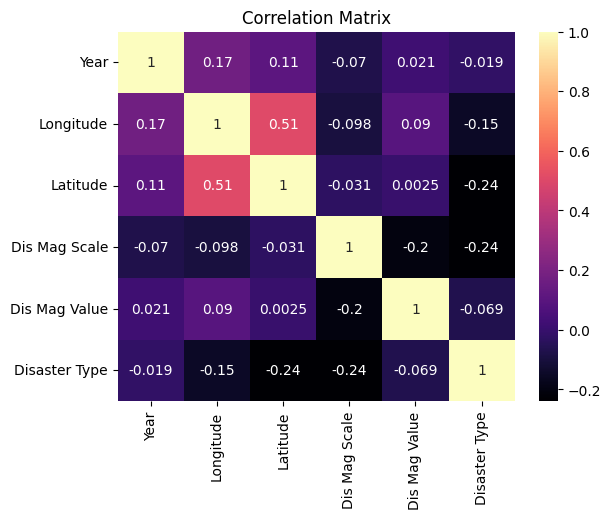

In [ ]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='magma')
plt.title('Correlation Matrix')
plt.show()

## Building and training models

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [ ]:
# establishing variables
X = data.drop('Disaster Type', axis=1)
y = data['Disaster Type']

# splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1. Decision Tree

In [ ]:
# building the model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
# evaluating model
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree classifier:")
print("Accuracy: %f"%(accuracy_score(y_test,y_pred_dt)*100))
print("Recall: %f"%(recall_score(y_test,y_pred_dt, average='weighted')*100))

Decision Tree classifier:
Accuracy: 87.417219
Recall: 87.417219


### 2. Support Vector Machine

In [ ]:
# building the model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
# evaluating model
y_pred_svm = svm_model.predict(X_test)

print("Support Vector Machine (SVM):")
print("Accuracy:", accuracy_score(y_test, y_pred_svm)*100)
print("Recall:", recall_score(y_test,y_pred_svm, average='weighted'))

Support Vector Machine (SVM):
Accuracy: 48.34437086092716
Recall: 0.48344370860927155


### 3. KNN model

In [ ]:
# building model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# evaluating model
y_pred_knn = knn_model.predict(X_test)

print("K-Nearest Neighbors (KNN):")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

K-Nearest Neighbors (KNN):
Accuracy: 0.7947019867549668


## Comparing models

In [ ]:
# Decision Tree
print("Decision Tree evaluation metrics:")
print("F1 Score:", f1_score(y_test, y_pred_dt, average='weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Recall (Sensitivity):", recall_score(y_test, y_pred_dt, average='weighted'))
print("Precision:", precision_score(y_test, y_pred_dt, average='weighted'))
print("\n")

# SVM
print("Support Vector Machine (SVM)-Evaluation Metrics:")
print("F1 Score:", f1_score(y_test, y_pred_svm, average='weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Recall (Sensitivity):", recall_score(y_test, y_pred_svm, average='weighted'))
print("Precision:", precision_score(y_test, y_pred_svm, average='weighted'))
print("\n")

# K-NN
print("K-Nearest Neighbor (K-NN)-Evaluation Metrics:")
print("F1 Score:", f1_score(y_test, y_pred_knn, average='weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Recall (Sensitivity):", recall_score(y_test, y_pred_knn, average='weighted'))
print("Precision:", precision_score(y_test, y_pred_knn, average='weighted'))

Decision Tree evaluation metrics:
F1 Score: 0.8366149606649185
Accuracy: 0.8741721854304636
Recall (Sensitivity): 0.8741721854304636
Precision: 0.8050854386395225


Support Vector Machine (SVM)-Evaluation Metrics:
F1 Score: 0.3645461234865209
Accuracy: 0.48344370860927155
Recall (Sensitivity): 0.48344370860927155
Precision: 0.3235572374645222


K-Nearest Neighbor (K-NN)-Evaluation Metrics:
F1 Score: 0.7588118640864617
Accuracy: 0.7947019867549668
Recall (Sensitivity): 0.7947019867549668
Precision: 0.7415140603189272




In [ ]:
# visualisation

metrics = {
    'Model Type': ['Decision Tree', 'SVM', 'KNN'],
    'Accuracy': [87.41, 48.34, 79.47],
    'Precision': [80.50, 32.35, 74.15],
    'Recall': [87.41, 48.34, 79.47],
    'F1 Score': [83.66, 36.45, 75.88]
}

df = pd.DataFrame(metrics)

# Melt the dataframe for using sns
df_melted = df.melt(id_vars='Model Type', var_name='Metric', value_name='Score')

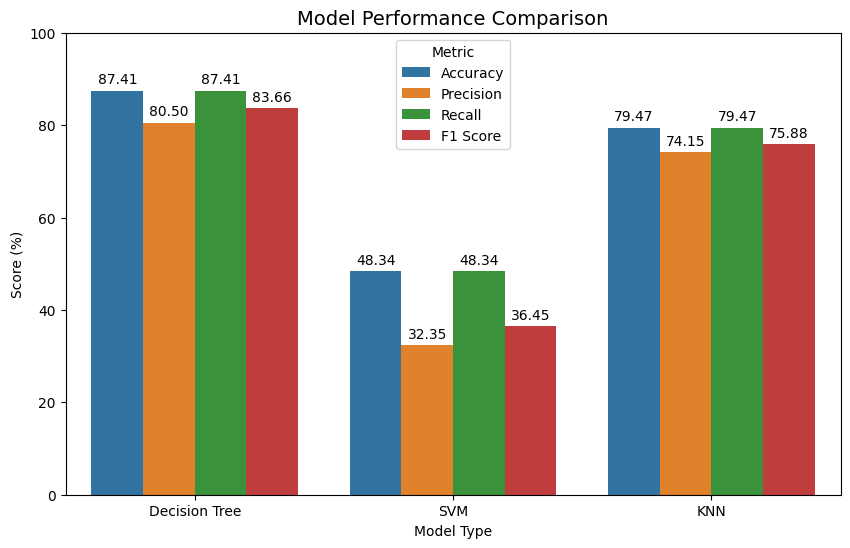

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_melted, x='Model Type', y='Score', hue='Metric', palette='tab10')

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=10, padding=3)

plt.title('Model Performance Comparison', fontsize=14)
plt.ylabel('Score (%)')
plt.ylim(0, 100)
plt.legend(title='Metric')

plt.show()

# Floods

In [ ]:
# Loading the dataset
import numpy as np
import pandas as pd
data = pd.read_csv('kerala floods.csv')
data

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO


In [ ]:
# Checking for null values
data.isnull().sum()

,0
SUBDIVISION,0
YEAR,0
JAN,0
FEB,0
MAR,0
APR,0
MAY,0
JUN,0
JUL,0
AUG,0


In [ ]:
# Dropping irrelevant columns, i.e., cleaning the dataset
data = data.drop('SUBDIVISION', axis=1)
data

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO


In [ ]:
data.shape

(118, 15)

In [ ]:
# Encoding the values to 0/1 instead of YES/NO
data['FLOODS'] = data['FLOODS'].replace(['YES','NO'], [1,0])
data

<ipython-input-51-6fdd68896ecf>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['FLOODS'] = data['FLOODS'].replace(['YES','NO'], [1,0])


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,1
114,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,0
115,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,0
116,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,0


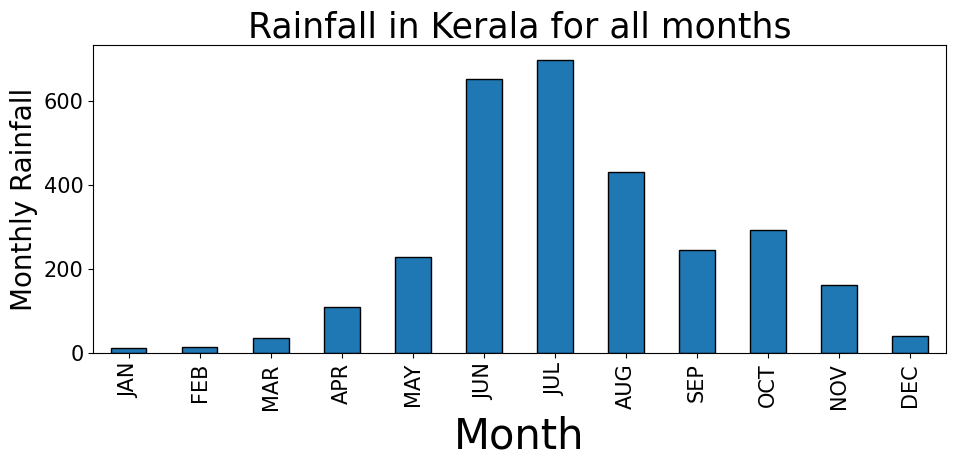

In [ ]:
# Visualization of overall rainfall
import matplotlib.pyplot as plt

ax = data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].mean().plot.bar(
                        width=0.5,
                        edgecolor='k',
                        align='center',
                        linewidth=1,
                        figsize=(11,4))

plt.xlabel('Month',fontsize=30)
plt.ylabel('Monthly Rainfall',fontsize=20)
plt.title('Rainfall in Kerala for all months',fontsize=25)
ax.tick_params(labelsize=15)
# plt.grid()
plt.show()

In [ ]:
# Establishing independent and dependent variables
X = data.drop(['FLOODS'], axis=1)
y = data['FLOODS']

In [ ]:
X

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4
114,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6
115,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6
116,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1


In [ ]:
y

,FLOODS
0,1
1,1
2,1
3,1
4,0
...,...
113,1
114,0
115,0
116,0


In [ ]:
# Minmax scaling across X
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))

X = pd.DataFrame(minmax.fit_transform(X), columns=X.columns)
X

In [ ]:
# Creating training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
44,0.376068,0.052695,0.125316,0.058038,0.404624,0.000000,0.391613,0.394776,0.141932,0.143387,0.371045,0.682430,0.088526,0.151235
12,0.102564,0.037126,0.065823,0.094887,0.278346,0.212139,0.382627,0.438337,0.056216,0.279357,0.708851,0.234660,0.226014,0.225439
15,0.128205,0.000000,0.098734,0.100875,0.308137,0.212431,0.802529,0.254893,0.178890,0.613927,0.505006,0.307692,0.043521,0.364570
70,0.598291,0.378443,0.234177,0.091663,0.444197,0.385322,0.768582,0.354010,0.169303,0.597239,0.305166,0.020353,0.307616,0.419266
107,0.914530,0.009581,0.383544,1.000000,0.423744,0.040560,0.302973,0.248418,0.139638,0.629790,0.550461,0.071535,0.083581,0.189543


In [ ]:
# Typecasting to prevent irregular values
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [ ]:
# Creating the model and fitting data to it
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=100)
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Making predictions
y_pred = lr.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0])

In [ ]:
# Evaluating model performance
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

print("Accuracy: %f"%(accuracy_score(y_test,y_pred)*100))
print("Recall: %f"%(recall_score(y_test,y_pred)*100))
print("ROC score: %f"%(roc_auc_score(y_test,y_pred)*100))

accuracy: 95.833333
recall: 92.857143
roc score: 96.428571
